<a href="https://colab.research.google.com/github/androbaza/IP-algos/blob/main/1_Box_Filter_Difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
import skimage
from imageio import imread
from skimage.transform import resize
from scipy.ndimage.filters import convolve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(512, 512)


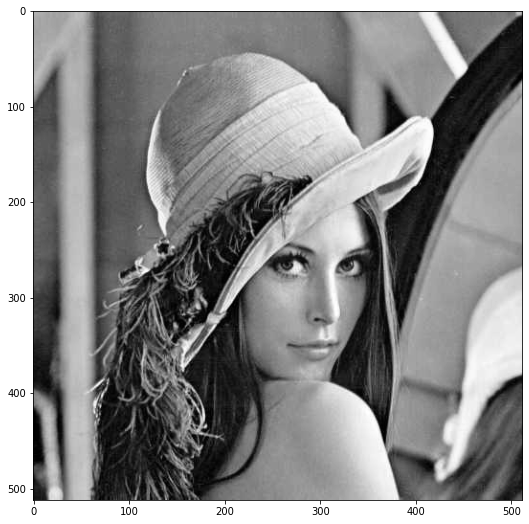

In [3]:
im = imread("/content/drive/MyDrive/samples/lena.jpg", pilmode="L")

print(im.shape)

fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(im, cmap=plt.cm.gray)
plt.show()

# Exercise 3: Edge and Rank Filters

**Filtering** is a discrete convolution of an image $I$ with a filter mask $A \in \mathbb{R}^{m \times n}$:

$$
\begin{align}
 I_{A}       &= I * A \\
 I_{A}(i, j) &= \left(I * A\right)(i, j) \\
             &= \sum_{h=1}^{m} \sum_{k=1}^{n} A(h, k) \cdot I\left( i+h-1-\left\lfloor\frac{m}{2}\right\rfloor,\; j+k-1-\left\lfloor\frac{n}{2}\right\rfloor \right)
\end{align}
$$

Typically, the filter masks are square matrices, i.e., $n=m$ with odd dimensions (e.g., $3 \times 3, 5 \times 5, 7 \times 7, \dotsc$).

A special case of filter masks is the **box filter**:

$$
\begin{align}
  B =%
  \dfrac{1}{9}\begin{pmatrix}
              1&1&1\\1&1&1\\1&1&1
             \end{pmatrix}.
\end{align}
$$

## Task 1 - Difference between filter result and input

*Hint: For these Tasks convert the image to floating point values in the range [0.0 ... 1.0].* 

1. Compute the a convolution $I_B$ of an image $I$ with a box filter $B$.
2. Compute the difference image $D_B=I_B-I$ and visualize the result. How can we interpret the result? 
3. What is the mathematical background behind this difference image (*hint: dirac impulse*)?
4. How can we compute $D_B$ directly from $I$ and $B$ without the intermediate $I_B$?
5. Compare the two ways of computing the difference image.

### Solutions

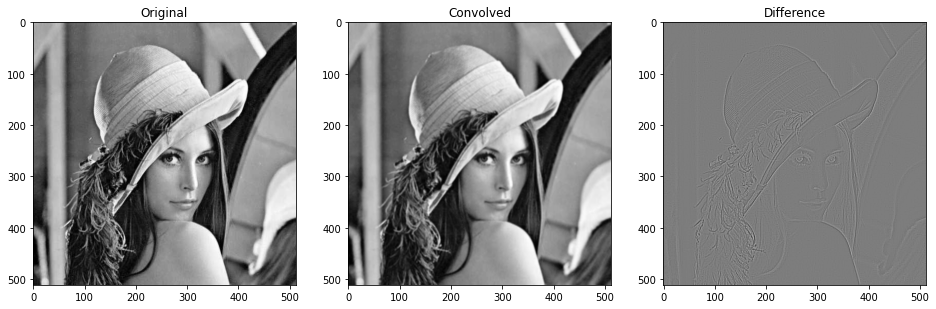

In [7]:
# TODO: convert pixel range from [0 .. 255] to [0 .. 1] 
I = skimage.exposure.rescale_intensity(im, 'image', (0, 1))### FILL ME!

# Construct box filter
size = 9
B = np.ones((3,3))/size### FILL ME!

# Convolve and compute difference
I_B = convolve(I, B) ### FILL ME!
D_B = I_B - I ### FILL ME!

# Visualize
fig, axs = plt.subplots(1,3, figsize=(16,9))

axs[0].imshow(I, cmap=plt.cm.gray)
axs[0].set_title("Original")

axs[1].imshow(I_B, cmap=plt.cm.gray)
axs[1].set_title("Convolved")

axs[2].imshow(D_B, cmap=plt.cm.gray)
axs[2].set_title("Difference")

plt.show()

the result is edges of objects in the image - which are "filtered" from the original image by box filter

### Mathematical background

*TODO: use the dirac impulse to construct $C$ from $B$*

$$
\begin{align}
D_B &= I - I_B \\
D_B &= I - I * B \\
D_B(i, j) &= I(i,j) - \left(I * B\right)(i, j) \\
 &= I(i,j) -\sum_{h=1}^{m} \sum_{k=1}^{n} B(h, k) \cdot I\left( i+h-1-\left\lfloor\frac{m}{2}\right\rfloor,\; j+k-1-\left\lfloor\frac{n}{2}\right\rfloor \right) \\
 \dots \\
D_B &= I * C
\end{align}
$$

with $C=???$

### Comparison

Mean absolute error: 4.518e-17
Are these images identical? True


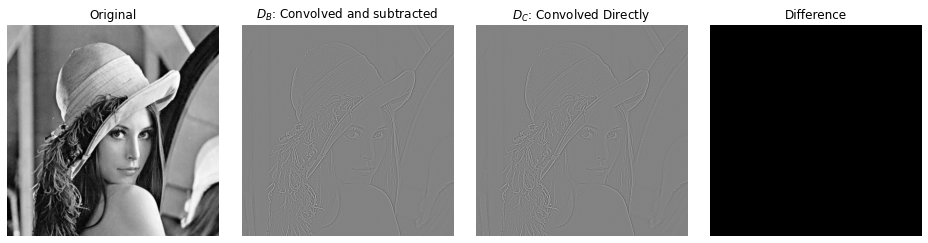

In [5]:
import skimage
import scipy
# TODO: convert pixel range from [0 .. 255] to [0 .. 1] 
I = skimage.exposure.rescale_intensity(im, 'image', (0, 1))### FILL ME!

# Construct box filter
size = 9
B = np.ones((3,3))/size ### FILL ME!

# Compute C according to the equation derived above
C = scipy.signal.unit_impulse((3,3), 'mid') - B
# np.array([[0,0,0],
#                [0,1,0],
#                [0,0,0]])### FILL ME!

D_B = I - convolve(I, B)
D_C = convolve(I, C)

abs_diff = np.abs(D_C - D_B)

print("Mean absolute error: {:.4g}".format(abs_diff.mean()))
print("Are these images identical?", np.allclose(D_C, D_B, atol=1e-6))

fig, axs = plt.subplots(1,4, figsize=(13,5))

axs[0].imshow(I, cmap=plt.cm.gray)
axs[0].set_title("Original")

axs[1].imshow(D_B, cmap=plt.cm.gray)
axs[1].set_title("$D_B$: Convolved and subtracted")

axs[2].imshow(D_C, cmap=plt.cm.gray)
axs[2].set_title("$D_C$: Convolved Directly")

axs[3].imshow(abs_diff, vmin=0, vmax=1, cmap=plt.cm.gray)
axs[3].set_title("Difference")

for ax in axs.ravel():
    ax.axis('off')

fig.tight_layout()
plt.show()

images are identical!!